In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp
import Convex_lossy_data_compression.main_algo as main_algo

1D - Gaussian

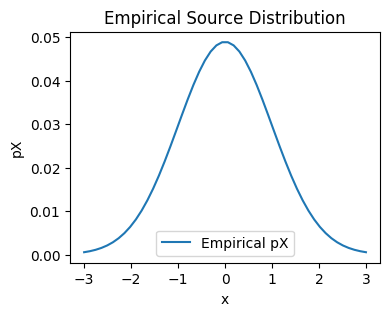

In [2]:
n = 50
xs = np.linspace(-3, 3, n)       
px_unnorm = np.exp(-0.5 * xs**2)
pX = px_unnorm / px_unnorm.sum()
plt.figure(figsize=(4, 3))
plt.plot(xs, pX, label="Empirical pX")
plt.xlabel("x")
plt.ylabel("pX")
plt.title("Empirical Source Distribution")
plt.legend()
plt.show()
m = 8
ys = np.linspace(-3, 3, m)


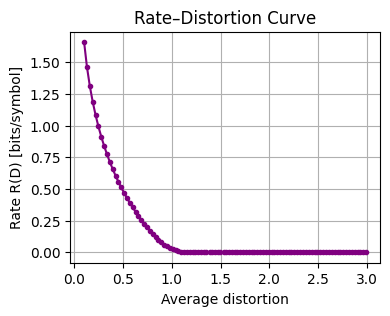

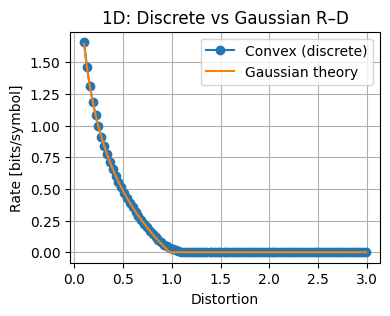

In [3]:
Dmat = main_algo.squared_euclidean_Dmat(xs, ys)
D_targets = np.linspace(0.1, 3.0, 100)  
D_vals, Ivals = main_algo.run_rd_curve(pX, Dmat, D_targets)
main_algo.plot_rd_curve(D_vals, Ivals, title="Rate–Distortion Curve")

# empirical variance of your 1D source
sigma2 = np.sum(pX * xs**2)

def R_gaussian(D):
    return np.maximum(0.0, 0.5 * np.log(sigma2 / D))

D_dense = np.linspace(min(D_vals[D_vals>0]), max(D_vals), 200)
R_theory = R_gaussian(D_dense)

R_bits = np.array(Ivals) / np.log(2)
R_theory_bits = R_theory / np.log(2)

plt.figure(figsize=(4,3))
plt.plot(D_vals, R_bits, 'o-', label="Convex (discrete)")
plt.plot(D_dense, R_theory_bits, '-', label="Gaussian theory")
plt.xlabel("Distortion")
plt.ylabel("Rate [bits/symbol]")
plt.title("1D: Discrete vs Gaussian R–D")
plt.legend()
plt.grid(True)
plt.show()


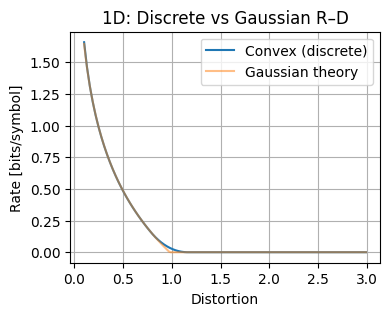

In [4]:
sigma2 = np.sum(pX * xs**2)

def R_gaussian(D):
    return np.maximum(0.0, 0.5 * np.log(sigma2 / D))

D_dense = np.linspace(min(D_vals[D_vals>0]), max(D_vals), 200)
R_theory = R_gaussian(D_dense)

R_bits = np.array(Ivals) / np.log(2)
R_theory_bits = R_theory / np.log(2)

plt.figure(figsize=(4,3))
plt.plot(D_vals, R_bits, '', label="Convex (discrete)")
plt.plot(D_dense, R_theory_bits, '-', label="Gaussian theory", alpha=0.5)
plt.xlabel("Distortion")
plt.ylabel("Rate [bits/symbol]")
plt.title("1D: Discrete vs Gaussian R–D")
plt.legend()
plt.grid(True)
plt.show()

2D - Gaussian 

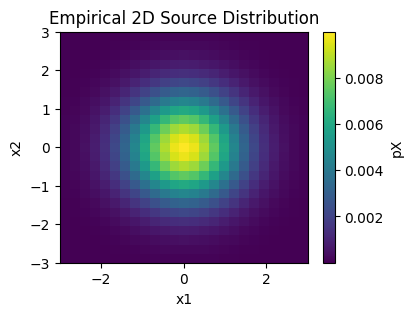

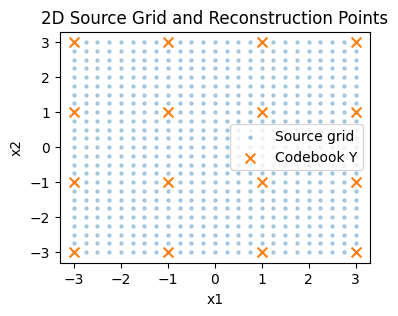

In [5]:
nx = 25
xs = np.linspace(-3, 3, nx)

X1, X2 = np.meshgrid(xs, xs)
X = np.column_stack([X1.ravel(), X2.ravel()])
n = X.shape[0]

px_unnorm = np.exp(-0.5 * (X[:, 0]**2 + X[:, 1]**2))
pX = px_unnorm / px_unnorm.sum()

plt.figure(figsize=(4, 3))
plt.imshow(pX.reshape(nx, nx), extent=[-3, 3, -3, 3], origin='lower', aspect='auto')
plt.colorbar(label="pX")
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Empirical 2D Source Distribution")
plt.show()

m_side = 4
ys = np.linspace(-3, 3, m_side)
Y1, Y2 = np.meshgrid(ys, ys)
Y = np.column_stack([Y1.ravel(), Y2.ravel()])
m = Y.shape[0]

plt.figure(figsize=(4, 3))
plt.scatter(X[:, 0], X[:, 1], s=5, alpha=0.3, label="Source grid")
plt.scatter(Y[:, 0], Y[:, 1], s=50, marker='x', label="Codebook Y")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.title("2D Source Grid and Reconstruction Points")
plt.show()

/opt/homebrew/lib/python3.11/site-packages/cvxpy/problems/problem.py:1504: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


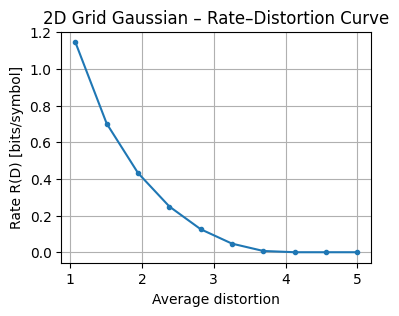

In [6]:
Dmat = main_algo.squared_euclidean_Dmat(X, Y)
D_targets = np.linspace(0.2, 5.0, 12)
D_vals, I_vals = main_algo.run_rd_curve(pX, Dmat, D_targets)
R_bits = I_vals / np.log(2)
plt.figure(figsize=(4, 3))
plt.plot(D_vals, R_bits, marker='.')
plt.xlabel("Average distortion")
plt.ylabel("Rate R(D) [bits/symbol]")
plt.title("2D Grid Gaussian – Rate–Distortion Curve")
plt.grid(True)
plt.show()

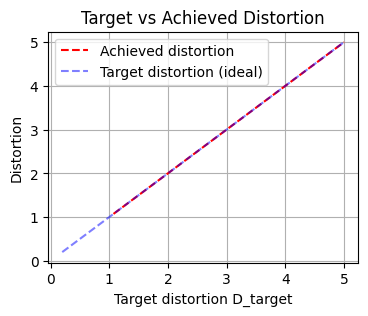

In [7]:
plt.figure(figsize=(4, 3))
plt.plot(D_targets, D_vals, 'r--', label="Achieved distortion")
plt.plot(D_targets, D_targets, 'b--', label="Target distortion (ideal)",alpha=0.5)
plt.xlabel("Target distortion D_target")
plt.ylabel("Distortion")
plt.title("Target vs Achieved Distortion")
plt.legend()
plt.grid(True)
plt.show()


Trimodal mixture

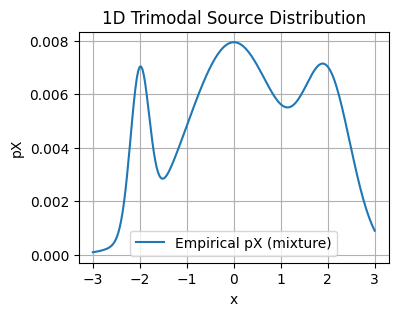

In [8]:
n = 200
xs = np.linspace(-3, 3, n)
weights = np.array([0.3, 0.4, 0.3])
means   = np.array([-2.0, 0.0, 2.0])
stds    = np.array([0.2, 1.0, 0.5])

px_unnorm = np.zeros_like(xs)
for w, mu, sigma in zip(weights, means, stds):
    px_unnorm += w * np.exp(-0.5 * ((xs - mu) / sigma)**2)
pX = px_unnorm / px_unnorm.sum()
plt.figure(figsize=(4, 3))
plt.plot(xs, pX, label="Empirical pX (mixture)")
plt.xlabel("x")
plt.ylabel("pX")
plt.title("1D Trimodal Source Distribution")
plt.legend()
plt.grid(True)
plt.show()
m = 16
ys = np.linspace(-3, 3, m)



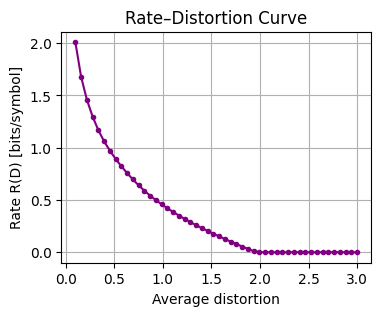

In [9]:
Dmat = main_algo.squared_euclidean_Dmat(xs, ys)
D_targets = np.linspace(0.1, 3.0, 50)  
D_vals, Ivals = main_algo.run_rd_curve(pX, Dmat, D_targets)
main_algo.plot_rd_curve(D_vals, Ivals, title="Rate–Distortion Curve")

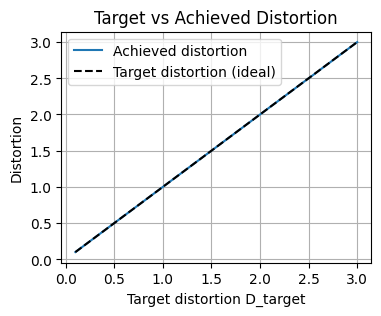

In [10]:
plt.figure(figsize=(4, 3))
plt.plot(D_targets, D_vals, '-', label="Achieved distortion")
plt.plot(D_targets, D_targets, 'k--', label="Target distortion (ideal)")
plt.xlabel("Target distortion D_target")
plt.ylabel("Distortion")
plt.title("Target vs Achieved Distortion")
plt.legend()
plt.grid(True)
plt.show()


1-D Gaussian with constraints

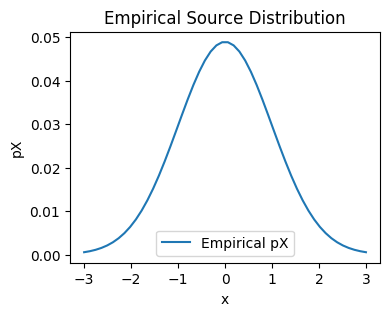

In [11]:
n = 50
xs = np.linspace(-3, 3, n)       
px_unnorm = np.exp(-0.5 * xs**2)
pX = px_unnorm / px_unnorm.sum()
plt.figure(figsize=(4, 3))
plt.plot(xs, pX, label="Empirical pX")
plt.xlabel("x")
plt.ylabel("pX")
plt.title("Empirical Source Distribution")
plt.legend()
plt.show()
m = 8
ys = np.linspace(-3, 3, m)


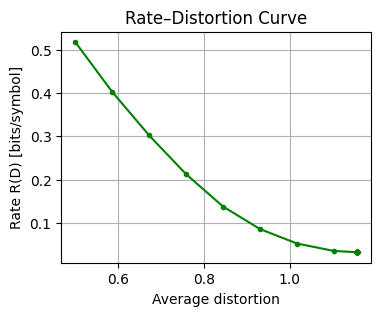

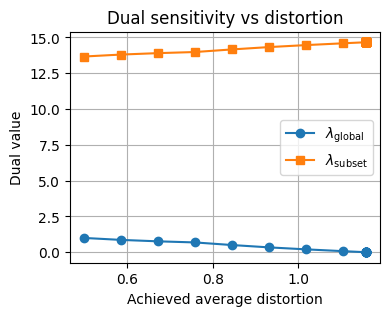

In [12]:
subset_idx = np.where(np.abs(xs) < 0.1)[0]
D_prime = 0.015
Dmat = main_algo.squared_euclidean_Dmat(xs, ys)
D_targets = np.linspace(0.5, 3.0, 30)

(D_vals,I_vals,dual_global,dual_subset) = main_algo.run_rd_curve_with_fidelity(pX, Dmat, D_targets, Dprime=D_prime, subset_idx=subset_idx)

main_algo.plot_rd_curve_with_fidelity(D_vals, I_vals, title="Rate–Distortion Curve")
main_algo.plot_dual_sensitivity(D_vals, dual_global, dual_subset, title="Dual sensitivity vs distortion")


In [13]:
D_target = 0.6
res = main_algo.convex_solve_rd(D_target, n, m, pX, Dmat)
ents = main_algo.compute_entropies_from_solution(res, pX)
print("H(Y):", ents["H_Y"])
print("H(Y|X):", ents["H_Y_given_X"])
print("I_emp (from entropies):", ents["I_emp"])
print("I_opt (CVX):", res["I_opt"])


H(Y): 1.085566783851021
H(Y|X): 0.8417624542993116
I_emp (from entropies): 0.2438043295517094
I_opt (CVX): 0.2438043295717809
